In [2]:
from google.colab import files
uploaded = files.upload()

Saving ptbxl_database.csv to ptbxl_database.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving scp_statements.csv to scp_statements.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data.xlsx to Lab Session Data.xlsx


In [5]:
from google.colab import files
uploaded = files.upload()

Saving 01000_lr.dat to 01000_lr.dat
Saving 01000_lr.hea to 01000_lr.hea
Saving 01001_lr.dat to 01001_lr.dat


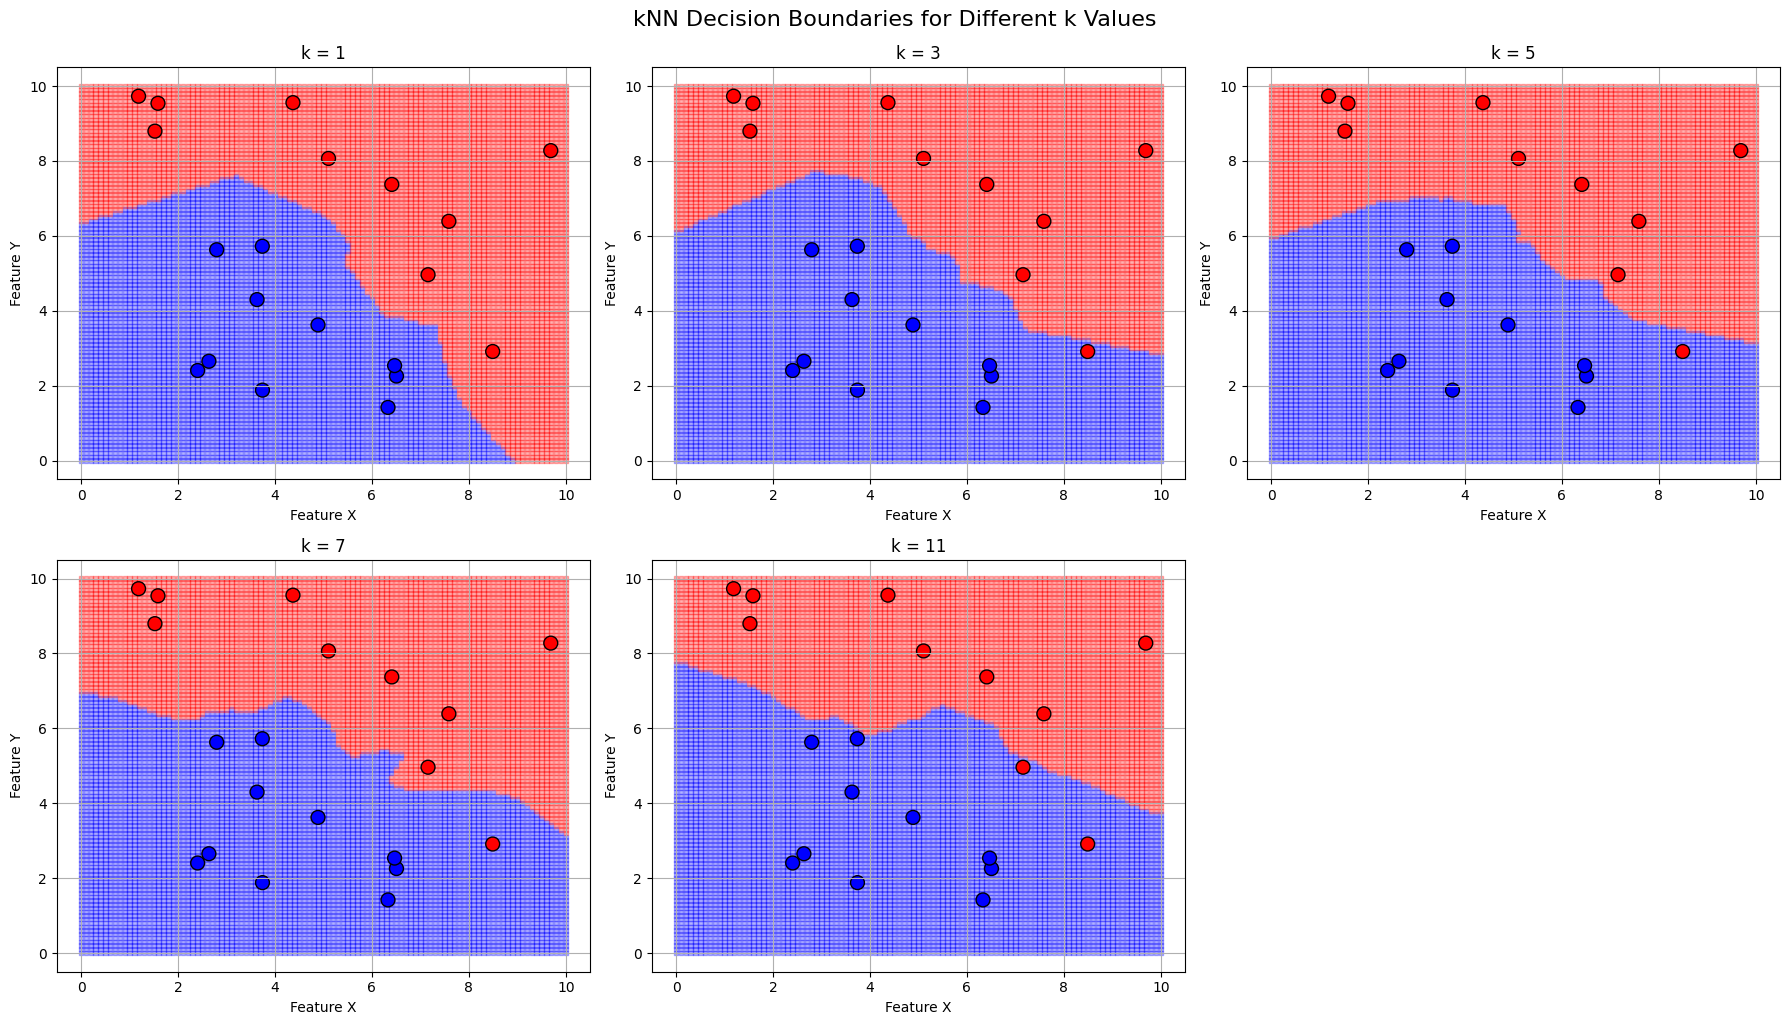

In [23]:
#A5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# ---------------------------- Function 1 ----------------------------
def generate_training_data(seed=42):
    np.random.seed(seed)
    X_train = np.random.uniform(1, 10, size=(20, 2))
    df = pd.DataFrame(X_train, columns=["X", "Y"])
    df["Class"] = np.where(df["X"] + df["Y"] > 10, 1, 0)
    return df

# ---------------------------- Function 2 ----------------------------
def generate_test_grid(x_range=(0, 10), y_range=(0, 10), step=0.1):
    x_vals = np.arange(x_range[0], x_range[1] + step, step)
    y_vals = np.arange(y_range[0], y_range[1] + step, step)
    xx, yy = np.meshgrid(x_vals, y_vals)
    X_test = np.c_[xx.ravel(), yy.ravel()]
    return X_test, xx, yy

# ---------------------------- Function 3 ----------------------------
def train_knn_classifier(X_train, y_train, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

# ---------------------------- Function 4 ----------------------------
def predict_test_data(model, X_test):
    return model.predict(X_test)

# ---------------------------- Function 5 ----------------------------
def plot_decision_boundaries(df_train, X_test, y_preds, k_values):
    X_train = df_train[["X", "Y"]].values
    y_train = df_train["Class"].values

    plt.figure(figsize=(18, 10))
    for idx, (k, y_pred) in enumerate(zip(k_values, y_preds)):
        plt.subplot(2, 3, idx + 1)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=np.where(y_pred == 0, 'blue', 'red'),
                    s=10, alpha=0.3, marker='s')
        plt.scatter(X_train[:, 0], X_train[:, 1], c=np.where(y_train == 0, 'blue', 'red'),
                    s=100, edgecolor='black')
        plt.title(f"k = {k}")
        plt.xlabel("Feature X")
        plt.ylabel("Feature Y")
        plt.grid(True)

    plt.tight_layout()
    plt.suptitle("kNN Decision Boundaries for Different k Values", fontsize=16, y=1.02)
    plt.show()

# ---------------------------- Main Program ----------------------------
def main():
    # Step 1: Generate training and test data
    df_train = generate_training_data()
    X_test, xx, yy = generate_test_grid()

    # Step 2: Prepare data
    X_train = df_train[["X", "Y"]].values
    y_train = df_train["Class"].values
    k_values = [1, 3, 5, 7, 11]

    # Step 3: Train and predict for each k
    y_preds = []
    for k in k_values:
        model = train_knn_classifier(X_train, y_train, k)
        y_pred = predict_test_data(model, X_test)
        y_preds.append(y_pred)

    # Step 4: Plot
    plot_decision_boundaries(df_train, X_test, y_preds, k_values)

# Run the program
main()
